### Explication des modèles

<details>
<summary><font color="black"><b> Modèle ElasticNet :</b></font></summary>

La régression linéaire est un modèle simple tente de minimiser la somme des erreurs au carré. 
L'erreur dans ce cas est la différence entre la donnée réelle et sa valeur prédite. 
Pour produire un modèle plus précis de données complexes, nous pouvons ajouter un <b>terme de pénalité à l'équation OLS</b>.
Une pénalité ajoute un <b>biais</b> sur certaines valeurs. 

Celles-ci sont appelées <b>régularisation L1 <em>(régression Lasso)</em></b> et <b>régression L2 <em>(régression Ridge)</em></b>. Le meilleur modèle que nous pouvons espérer proposer minimise à la fois le biais et la variance.

<h5>Régression Ridge</h5>
La régression Ridge utilise une régularisation L2 qui ajoute la pénalité suivante à l'équation OLS : $\large + \lambda \sum_{j=0}^{p} w^0_j$

Le terme L2 est égal au carré de la magnitude des coefficients. Dans ce cas, si lambda ($\lambda$) est égal à zéro, l'équation est l'OLS de base mais si elle est supérieure à zéro, nous ajoutons une contrainte aux coefficients. <b>La régression Ridge diminue la complexité d'un modèle mais ne réduit pas le nombre de variables, elle réduit simplement leur effet</b>.
    
<h5>Régression Lasso</h5>
La régression Lasso utilise le terme de pénalité L1 et représente le Least Absolute Shrinkage et l'opérateur de sélection. La pénalité appliquée est égale à la valeur absolue de la magnitude des coefficients : $\large + \lambda \sum_{j=0}^{p} |w_j|$
    
    <b>L'application de ce terme peut éliminer complètement certaines variables</b> et donner un sous-ensemble de prédicteurs qui aident à atténuer la multi-colinéarité et la complexité du modèle.
    
<h5>Elastic Net</h5>
Elastic Net incorpore des pénalités de régularisation L1 et L2 :
$$\large \frac{\sum^{n}_{i=1}(y_i - x^i_j \hat{\beta})^2}{2n} + \lambda \left( \frac{1 - \alpha}{2} \sum^{m}_{j=1} \hat{\beta}^2_j + \alpha \sum^{m}_{j=1} |\hat{\beta}_j| \right) $$
    
En plus de définir et de choisir une valeur lambda, ElasticNet permet également d'ajuster le paramètre alpha où $\large \alpha = 0$ correspond à Ridge et $\large \alpha = 1$ à Lasso. On peut donc choisir une valeur alpha entre 0 et 1 pour optimiser ElasticNet <em>(cela réduira certains coefficients et en mettra d'autres à 0 pour une sélection parcimonieuse)</em>.
</details>


<details>
<summary><font color="black"><b>Modèle Support Vector Regression (SVR) :</b></font></summary>
<h5>Les machines à vecteur de support</h5>
Dans le cas de données linéairement séparables, il existe généralement une infinité d'hyperplans séparateurs qui classifient correctement les données. Pour formaliser lequel parmi ces multiples hyperplans nous convient le mieux, nous allons définir la <b>marge d'un hyperplan</b> séparateur $\mathcal{H}$ comme deux fois la distance de $\mathcal{H}$ au point du jeu de données qui en est le plus proche.
    
Dans la plupart des cas, les données ne sont pas linéairement séparables. Il va donc falloir accepter de faire des erreurs, autrement dit que certains points de notre jeu d'entraînement se retrouvent du mauvais côté de la frontière de la zone d'indécision.
![svm_6.png](attachment:ee1799ec-2438-4908-a56b-92ecc77d7cee.png)
    
Plus la marge est grande, plus nous somme susceptibles d'avoir d'erreurs. Nous allons donc devoir <b>minimiser la marge et l'erreur simultanément</b> :

$$\large arg \, {\underset{w \in \mathbb{R}^{p}, b \in \mathbb{R}}{min}} \frac{1}{2} ||w||^2_2 + C \text{ erreur}$$

L'hyperparamètre $\large C$ sert à quantifier l'importance relative du terme d'erreur et du terme de marge.

Il s'agit donc bien d'une <b>régularisation ℓ2</b>, et le coefficient $\large C$ vaut $\large \frac{1}{2\lambda}$ par rapport à ce que nous avons pu écrire pour la régression Ridge.
    
<b>Les SVM peuvent aussi être utilisées pour des problèmes de régression <em>(SVR)</em></b> et on cherche toujours à minimiser $\large ||w||^2_2$ 
</details>

<details>
<summary><font color="black"><b>Modèle RandomForestRegressor :</b></font></summary>
<h5>Random Forest</h5>
Les "forêts aléatoires" sont des algorithmes qui se basent sur l'assemblage d'arbre de décision indépendants.

Chaque arbre traitant seulement une partie du problème grâce à un double tirage aléatoire :
<ul>
    <li>Un tirage avec remplacement sur les individus : C'est le <b>tree bagging</b></li>
    <li>Un tirage aléatoire sur les variables : le <b>feature sampling</b></li>
</ul>

Au final, tous ces arbres de décisions indépendants sont assemblés. La prédiction faite par le random forest pour des données inconnues est alors la moyenne de tous les arbres dans le cas de la régression.
</details>

## 1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")
sns.color_palette("crest", as_cmap=True)
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

import os


**Chargeons les données**

In [2]:
data = pd.read_csv("data_cleaned.csv")
data.sample(5)

,BuildingType,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge_rescaled,GFABuildingNormalised,GFAParkingNormalised,GFAPerBuilding,GFAPerFloor,Electricity_ratio,Natural_gas_ratio,SteamUse_ratio
1114,NonResidential,Warehouse,GREATER DUWAMISH,1.0,1.0,23792.0,NaN,2852102.75,19.88,20,1.00000,0.00000,23792.0,23792.000,1.00000,0.00000,0.0
27,NonResidential,Small- and Mid-Sized Office,LAKE UNION,1.0,3.0,87262.0,NaN,4145920.50,157.77,105,1.00000,0.00000,87262.0,29087.333,0.32631,0.67369,0.0
1461,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,5.0,1.0,87458.0,NaN,8475238.00,270.63,45,1.00000,0.00000,17491.6,87458.000,0.45902,0.54098,0.0
216,NonResidential,Other,LAKE UNION,1.0,5.0,141131.0,NaN,3085814.00,21.51,0,0.50606,0.49394,141131.0,28226.200,1.00000,0.00000,0.0
136,NonResidential,Hotel,NORTHEAST,1.0,16.0,106860.0,49.0,11935719.00,469.57,80,1.00000,0.00000,106860.0,6678.750,0.29841,0.70159,0.0


Comme nous l'avons vu dans l'analyse exploratoire, un modèle simple de **régression linéaire multivarié** ne pourrait pas répondre totalement à notre problème de prédiction. Nous allons donc utiliser ce premier modèle comme baseline et tester les métriques principales : **R²** et **MAE**.

Nous allons tout d'abord séparer les données numériques et les données catégorielles de notre dataset :

In [3]:
numerical_features = data.select_dtypes(include=['int64','float64'])
categorical_features = data.select_dtypes(exclude=['int64','float64']) 

Pour les données catégorielles, nous allons devoir encoder les valeurs. Nous allons donc supprimer les variables qui n'apporteront rien à notre modèle *(les constantes par exemple)* et séparer les variables pouvant être encodées en OneHot des autres.

In [4]:
categorical_features.nunique()

BuildingType            5
PrimaryPropertyType    20
Neighborhood           19
dtype: int64

Pour toutes ces variables, nous utiliserons la méthode de  *TagetEncoder*  ou OneHOtEncoder depandament de celui qui fonctionne bien. Celui fonctrionera bien sera intégré dans un pipeline Sklearn. 

Nous allons commencer par les données qui ne contient pas le `ENERGYSTARScore`. 

In [5]:
energystar_score = numerical_features['ENERGYSTARScore']
numerical_features = numerical_features.drop(['ENERGYSTARScore'], axis=1)

Les données numériques doivent être standardisées pour entrer dans nos modèles de prédiction. Nous réaliserons un **centrage-réduction** via la méthode `StandardScaler` de Scikit-Learn.

In [6]:
data_filter = pd.concat([categorical_features, numerical_features], axis=1)

In [7]:
numerical_features = data_filter.select_dtypes(include=['int64','float64'])
numerical_features_col=list(numerical_features.columns)

In [8]:
numerical_features_col

['NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'SiteEnergyUse(kBtu)',
 'TotalGHGEmissions',
 'BuildingAge_rescaled',
 'GFABuildingNormalised',
 'GFAParkingNormalised',
 'GFAPerBuilding',
 'GFAPerFloor',
 'Electricity_ratio',
 'Natural_gas_ratio',
 'SteamUse_ratio']

In [9]:
categorical_features = data_filter.select_dtypes(exclude=['int64','float64']) 
categorical_features_col=list(categorical_features.columns)

In [10]:
categorical_features_col

['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

###  Encodage et standardisation des données

#### Préparation du Preprocessor

In [11]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, RobustScaler,OneHotEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.compose import ColumnTransformer


#target_transformer = TargetEncoder()
#target_transformer =OrdinalEncoder()

target_transformer=OneHotEncoder()

numeric_transformer = RobustScaler(unit_variance=True)
#numeric_transformer=StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('target', target_transformer, categorical_features_col),
    ('numeric', numeric_transformer, numerical_features_col)
])

### 1.2. Separation des données en  jeux d'entrainement et de test

Afin de **tester notre meilleur modèle** sur des données "inconnues", nous allons mettre de côté une partie des données initiales qui ne seront pas inclusent dans les modèles intermédiaires. Nous allons donc spliter nos données pour obtenir un jeu d'entrainement et un jeu de test.

In [12]:
X = data_filter.drop(['TotalGHGEmissions','SiteEnergyUse(kBtu)'], axis=1)
Y = data_filter[['SiteEnergyUse(kBtu)']]

y_columns = ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']
for i in y_columns:
    numerical_features_col.remove(i)
print(len(numerical_features_col))



11


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 1236 lignes,
Test: 310 lignes.



##  Modèle Baseline : Régression linéaire multivariée

A présent, nous allons créer un modèle baseline pour évaluer les performances de nos futurs modèles et vérifier qu'ils améliore les prédictions. Pour cette baseline, nous utiliserons une **régression linéaire multivariée**.

In [14]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
set_config(display='diagram')


param_mlr = {"regressor__fit_intercept": [True, False],
             "regressor__normalize": [True, False]}

mlr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_mlr', GridSearchCV(TransformedTargetRegressor(regressor=LinearRegression() ),
                            param_grid=param_mlr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

Nous allons calculer 2 principales métriques pour évaluer nos modèles :
- **MAE** : Mean Absolute Error.
- **R²** : Coeficient de détermination, carré du coefiscient de corrélation linéaire.

Tous les résultats des GridSearchCV sont stockés dans un DataFrame pour chaque variable à prédire :

In [15]:
def model_scores(pip,step):
    ''' cette fonction retorune les  meilleurs scores NMAE et R2
     et elle dans un  dataframe les resultats du modèle'''
    df_results = pd.DataFrame.from_dict(pip.named_steps[step].cv_results_) \
                    .sort_values('rank_test_neg_mean_absolute_error')
    
    return df_results

In [16]:
results = []
def model_scores2(pip,step,df_results):
    
    best_nmae = pip.named_steps[step].best_score_
    best_r2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    best_params = pip.named_steps[step].best_params_
    training_time = round((np.mean(df_results.mean_fit_time)*X_train.shape[0]),2)
    
    
    MAE = abs(pip.named_steps[step].best_score_)
    R2 = np.mean(df_results[df_results.rank_test_r2 == 1]['mean_test_r2'])
    results.append([MAE,R2])
    
    print("Meilleur score MAE : {}\nMeilleur Score R2 : {}\nMeilleurs paramètres : {}\nTemps moyen d'entrainement : {}s"\
         .format(round(best_nmae,3), round(best_r2,3), best_params, training_time))
    return results

On affiche les **scores de la GridSearch avec validation croisée** 

In [17]:
SEU_mlr_model = mlr_grid_cv.fit(X_train, Y_train)
SEU_mlr_results = model_scores(SEU_mlr_model, 'grid_search_mlr')
results=model_scores2(SEU_mlr_model, 'grid_search_mlr',SEU_mlr_results)



Meilleur score MAE : -4806691.312
Meilleur Score R2 : 0.503
Meilleurs paramètres : {'regressor__fit_intercept': True, 'regressor__normalize': False}
Temps moyen d'entrainement : 26.49s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

In [18]:
SEU_mlr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_r2,split1_test_r2,split2_test_r2,...,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
1,0.026411,0.005326,0.002484,0.001287,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-0.003222,0.512030,0.729188,...,-4.806691e+06,416375.700768,1,-4.505374e+06,-4.675117e+06,-4.155424e+06,-3.918438e+06,-4.424980e+06,-4.335867e+06,267795.278900
0,0.014451,0.007950,0.004030,0.002095,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-0.003221,0.512030,0.729169,...,-4.807678e+06,417982.842785,2,-4.505373e+06,-4.675117e+06,-4.155424e+06,-3.918438e+06,-4.424981e+06,-4.335866e+06,267795.084899
2,0.023778,0.004207,0.002055,0.001240,False,True,"{'regressor__fit_intercept': False, 'regressor...",-0.003221,0.512029,0.728727,...,-4.812850e+06,421938.119321,3,-4.505374e+06,-4.675117e+06,-4.155425e+06,-3.918440e+06,-4.424981e+06,-4.335867e+06,267794.338891
3,0.021078,0.003298,0.001670,0.000470,False,False,"{'regressor__fit_intercept': False, 'regressor...",-0.003221,0.512029,0.728727,...,-4.812850e+06,421938.119321,3,-4.505374e+06,-4.675117e+06,-4.155425e+06,-3.918440e+06,-4.424981e+06,-4.335867e+06,267794.338891


***Regardons les résultats***

In [19]:
SEU_mlr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_r2,split1_test_r2,split2_test_r2,...,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
1,0.026411,0.005326,0.002484,0.001287,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-0.003222,0.512030,0.729188,...,-4.806691e+06,416375.700768,1,-4.505374e+06,-4.675117e+06,-4.155424e+06,-3.918438e+06,-4.424980e+06,-4.335867e+06,267795.278900
0,0.014451,0.007950,0.004030,0.002095,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-0.003221,0.512030,0.729169,...,-4.807678e+06,417982.842785,2,-4.505373e+06,-4.675117e+06,-4.155424e+06,-3.918438e+06,-4.424981e+06,-4.335866e+06,267795.084899
2,0.023778,0.004207,0.002055,0.001240,False,True,"{'regressor__fit_intercept': False, 'regressor...",-0.003221,0.512029,0.728727,...,-4.812850e+06,421938.119321,3,-4.505374e+06,-4.675117e+06,-4.155425e+06,-3.918440e+06,-4.424981e+06,-4.335867e+06,267794.338891
3,0.021078,0.003298,0.001670,0.000470,False,False,"{'regressor__fit_intercept': False, 'regressor...",-0.003221,0.512029,0.728727,...,-4.812850e+06,421938.119321,3,-4.505374e+06,-4.675117e+06,-4.155425e+06,-3.918440e+06,-4.424981e+06,-4.335867e+06,267794.338891


Nous avons à présent nos métriques de départ obtenues avec notre modèle de régression linéaire multivarié servant de baseline. Nous allons réaliser nos premières modélisations en utilisant des modèles linéaires.

##  Modèle linéaires 



###  1. Modèle ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet

param_eNet = {"regressor__max_iter": [10, 100, 1000],
              "regressor__alpha": np.logspace(-4, 0, num=5),
              "regressor__l1_ratio": np.arange(0.0, 1.1, 0.1)}

eNet_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_enet', GridSearchCV(
                            TransformedTargetRegressor(regressor=ElasticNet()),
                            param_grid=param_eNet,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            return_train_score = True,
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

In [21]:
SEU_eNet_model = eNet_grid_cv.fit(X_train, Y_train)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.045313362622912e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.283259474178877e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.174805210338947e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.047685263463463e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.548871409359254e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.383484675850817e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.490518033877752e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.264816360098565e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.043692484223605e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0678467148352424e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3706957667263188e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.478086815048919e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.097178256028476e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.539097582925257e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5052179156463292e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.500346775078076e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.5563051220026516e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.7675577544871336e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordina

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.307358853429755e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.648077862934587e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.245795900868947e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.535646479929583e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2550252452461584.0, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.0552435961152296e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_de

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.62116886954009e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.504751238283117e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.353560567371486e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.059533815400927e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.660981651438168e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.13798941078298e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_d

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.17866945653235e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.5344569908012616e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7223293005981096e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.9026048335179096e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.980083157678267e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.834339121199899e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.908288180189834e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.034955028126763e+16, tolerance: 46806882028110.11
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.839273378089675e+16, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.505219457841183e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6285090177363704e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.940854285856846e+16, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0849837473345834e+17, tolerance: 46680964052488.51
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.126772107745461e+16, tolerance: 32971583568086.332
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.789773677344954e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.442804728911457e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0169051098094547e+17, tolerance: 34943844081425.18
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.1994617108791304e+16, tolerance: 37316838237680.68
  model = cd_fast.sparse_enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinat

In [22]:
SEU_eNet_results = model_scores(SEU_eNet_model, 'grid_search_enet')


In [23]:
results=model_scores2(SEU_eNet_model, 'grid_search_enet',SEU_eNet_results)

Meilleur score MAE : -4647207.658
Meilleur Score R2 : 0.519
Meilleurs paramètres : {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.0, 'regressor__max_iter': 100}
Temps moyen d'entrainement : 45.0s


### 2. Modèle Support Vector Regression (SVR)</font>



In [24]:
from sklearn.svm import LinearSVR

param_svr = {'regressor__C' : np.logspace(-4, 0, 5),
             'regressor__epsilon' : [0, 0.01, 0.1, 0.5, 1, 2],
             'regressor__loss' : ["epsilon_insensitive","squared_epsilon_insensitive"],
             'regressor__max_iter': [10, 100, 1000]}

svr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_svr', GridSearchCV(
                            TransformedTargetRegressor(regressor=LinearSVR()),
                            param_grid=param_svr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [25]:
SEU_svr_model = svr_grid_cv.fit(X_train, Y_train)
SEU_svr_results = model_scores(SEU_svr_model, 'grid_search_svr')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [26]:
results=model_scores2(SEU_svr_model, 'grid_search_svr',SEU_svr_results)
results

Meilleur score MAE : -4525348.887
Meilleur Score R2 : 0.46
Meilleurs paramètres : {'regressor__C': 0.1, 'regressor__epsilon': 2, 'regressor__loss': 'squared_epsilon_insensitive', 'regressor__max_iter': 10}
Temps moyen d'entrainement : 8.97s


[[4806691.312245888, 0.5027974229450698],
 [4647207.657747867, 0.5185822414656063],
 [4525348.886964387, 0.46041138662720194]]



## Conclusions:

1. Cela signifie que les modèles linéaires ne sont pas assez bons pour prédire cette variable

2. Il vaut mieux utiliser  les modèles non-linéaires.



## Modèle non-linéaires 

### 1. Modèle RandomForestRegressor


In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
param_rfr = {'regressor__max_features' : ['sqrt', 'log2'],
             'regressor__max_depth': [1,5, 15, 25, 50],
             'regressor__min_samples_split': [1,2, 5, 10],
             'regressor__bootstrap' : [True, False],
             'regressor__min_samples_leaf': [1,2,5,10]}

rfr_grid_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr', GridSearchCV(
                            TransformedTargetRegressor(regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=15,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            return_train_score = True,
                            n_jobs = -1))])

In [29]:
SEU_rfr_model = rfr_grid_cv.fit(X_train, Y_train)
SEU_rfr_results = model_scores(SEU_rfr_model, 'grid_search_rfr')


In [30]:
results=model_scores2(SEU_rfr_model, 'grid_search_rfr',SEU_rfr_results)

results

Meilleur score MAE : -3726289.639
Meilleur Score R2 : 0.661
Meilleurs paramètres : {'regressor__bootstrap': False, 'regressor__max_depth': 50, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}
Temps moyen d'entrainement : 201.61s


[[4806691.312245888, 0.5027974229450698],
 [4647207.657747867, 0.5185822414656063],
 [4525348.886964387, 0.46041138662720194],
 [3726289.638744302, 0.6612759167741676]]


##  Conclusions 
Sélection des meilleurs modèles

Sur les 4 modèles testés,les modèles linéaires retournent de moins bonnes métriques en général. Si nous prenons en considération le score MAE, qui aura du sens sur les modèles linéaires et non-linéaires, **algorithmes RandomForestRegressor offre des performances à peu près similaires pour la qualité des prédictions** mais les temps de calculs sont meilleurs sur le modèle RandomForestRegressor.

### Comparons les métriques obtenues

In [31]:
metrics = ['mean_fit_time', 'mean_score_time',
           'mean_test_neg_mean_absolute_error',
           'mean_train_neg_mean_absolute_error'
          ]
SEU_compare_metrics = pd.concat([pd.DataFrame(SEU_rfr_results[metrics].mean(), columns=['RandomForest']),
           pd.DataFrame(SEU_svr_results[metrics].mean(), columns=['LinearSVR']),
           pd.DataFrame(SEU_eNet_results[metrics].mean(), columns=['ElasticNet']),
           pd.DataFrame(SEU_mlr_results[metrics].mean(), columns=['LinearRegression'])
          ], axis=1)
SEU_final_metrics_compare = pd.DataFrame(columns=metrics, 
                                     index=['RandomForest',
                                            'LinearSVR','ElasticNet',
                                            'LinearRegression'])
for m in metrics:
    SEU_final_metrics_compare[m] = SEU_compare_metrics.loc[m]
SEU_compare_metrics.T

,mean_fit_time,mean_score_time,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error
RandomForest,0.163113,0.006948,-5.105641e+06,-4.256362e+06
LinearSVR,0.007257,0.001870,-6.494437e+06,-6.357378e+06
ElasticNet,0.036406,0.002110,-4.795282e+06,-4.408708e+06
LinearRegression,0.021429,0.002560,-4.810017e+06,-4.335867e+06


In [32]:
df_results = pd.DataFrame(results,columns=['MAE', 'R2'],index=['LinearRegression',
                                                               'ElasticNet',
                                                               'LinearSVR',
                                                               'RandomForest' ])
                                            
                                           
display(df_results.sort_values(by=['MAE','R2'],ascending=True))
                              

,MAE,R2
RandomForest,3.726290e+06,0.661276
LinearSVR,4.525349e+06,0.460411
ElasticNet,4.647208e+06,0.518582
LinearRegression,4.806691e+06,0.502797


In [33]:
m=SEU_compare_metrics.T

In [34]:
m['MAE']=df_results['MAE']
m['R2']=df_results['R2']

In [35]:
m.head()

,mean_fit_time,mean_score_time,mean_test_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,MAE,R2
RandomForest,0.163113,0.006948,-5.105641e+06,-4.256362e+06,3.726290e+06,0.661276
LinearSVR,0.007257,0.001870,-6.494437e+06,-6.357378e+06,4.525349e+06,0.460411
ElasticNet,0.036406,0.002110,-4.795282e+06,-4.408708e+06,4.647208e+06,0.518582
LinearRegression,0.021429,0.002560,-4.810017e+06,-4.335867e+06,4.806691e+06,0.502797


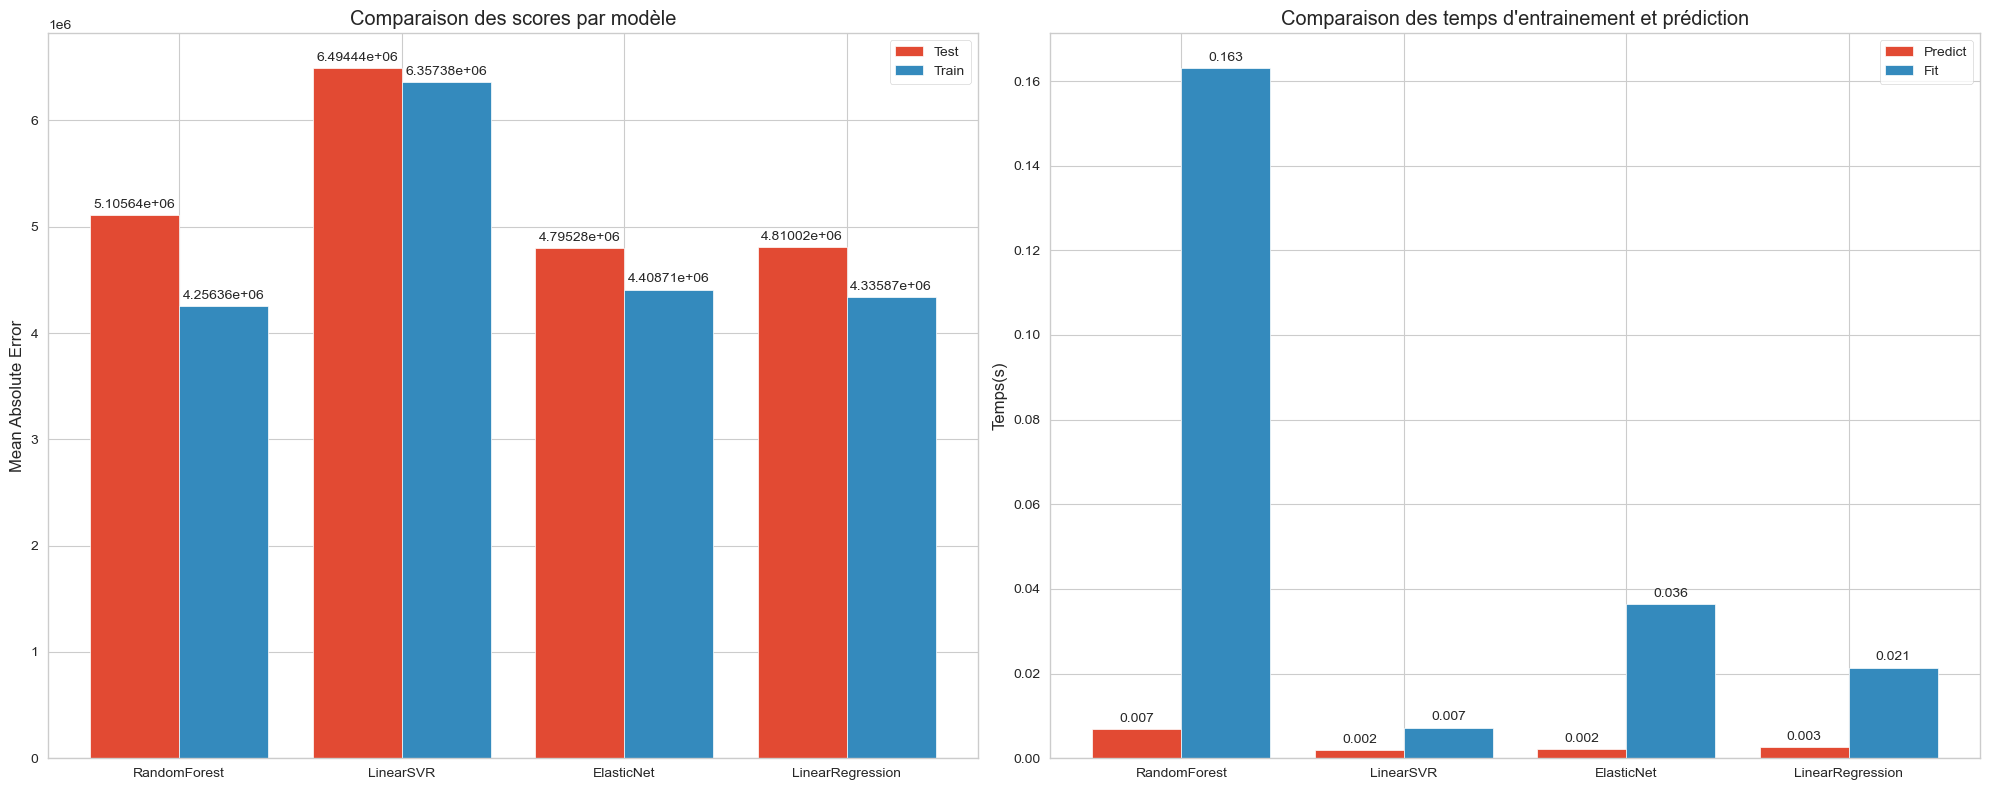

In [36]:
x = np.arange(len(SEU_final_metrics_compare.index))
width = 0.4

fig, ax = plt.subplots(1,2,figsize=(20,8), sharey=False, sharex=False)

scores1 = ax[0].bar(x - width/2, -1*SEU_final_metrics_compare['mean_test_neg_mean_absolute_error'], width, label='Test')
scores2 = ax[0].bar(x + width/2, -1*SEU_final_metrics_compare['mean_train_neg_mean_absolute_error'], width, label='Train')
ax[0].set_ylabel('Mean Absolute Error')
ax[0].set_title('Comparaison des scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(SEU_final_metrics_compare.index)
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, SEU_final_metrics_compare['mean_score_time'], width, label='Predict')
times2 = ax[1].bar(x + width/2, SEU_final_metrics_compare['mean_fit_time'], width, label='Fit')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(SEU_final_metrics_compare.index)
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

fig.tight_layout()

plt.show()

Pour la variable SiteEnergyUse, le modèle Elastic net offre à nouveau les meilleurs scores MAE et les meilleurs temps d'entrainement et de prédiction. **<font color="blue">Nous allons donc séléctionner le modèle RandomForest pour prédire la variable SiteEnergyUse</font>**.



##  Test des modèles sélectionnés

Nous allons à présent tester les modèles sélectionnés sur nos données test et vérifier leurs performances.


### Prédiction des consommations d'énergie

In [37]:
import time
start_time = time.time()

SEU_pred = SEU_rfr_model.predict(X_test)

print("Temps d'execution de l'agorithme : {:.2} s.".format((time.time() - start_time)))

Temps d'execution de l'agorithme : 0.014 s.


In [38]:
def metrics_model(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "R²"], "Résultats":[mae, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [39]:
SEUmetrics = metrics_model(Y_test,SEU_pred)
SEUmetrics

,Métrique,Résultats
0,MAE,4889862.007025
1,R²,[0.3808813488967062]


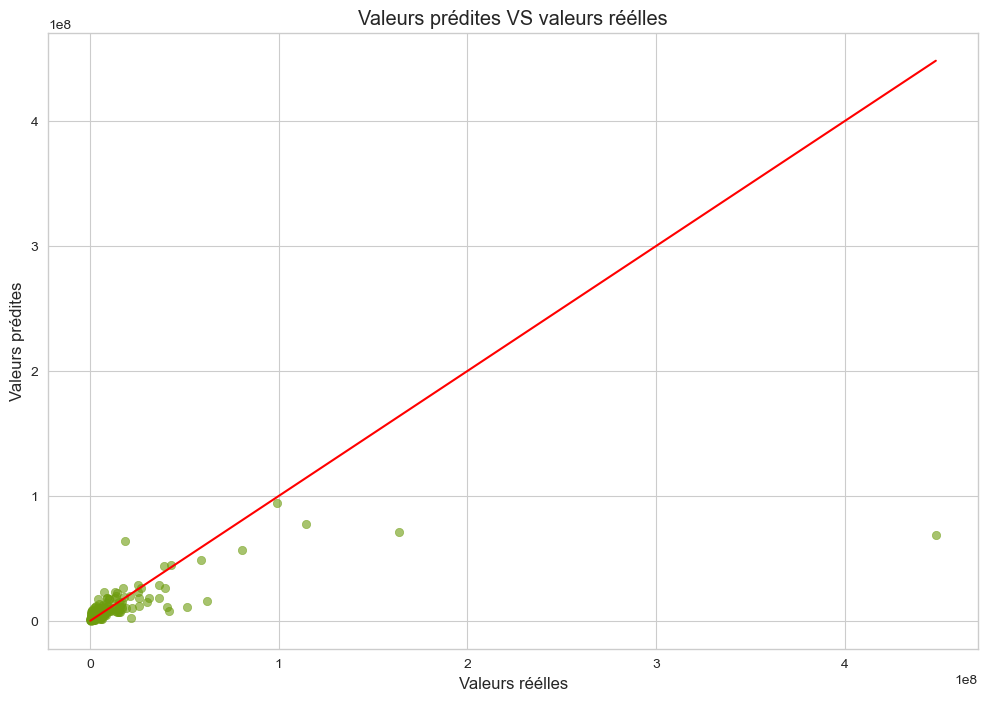

In [40]:
y_pred=SEU_pred
y_true=Y_test
X_plot = [Y_test.min(), Y_test.max()]
fig = plt.figure(figsize=(12,8))
plt.scatter(Y_test, SEU_pred, color="#6D9C0E", alpha=.6)
plt.plot(X_plot, X_plot, color='r')
plt.xlabel("Valeurs réélles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs prédites VS valeurs réélles")
plt.show()

Nous allons regarder les **écarts de prédiction en fonction du type de bâtiment** pour vérifier si des écarts sont plus importants dans certaines catégories :

In [41]:
final_SEU_test = pd.concat([X_test,Y_test],axis=1)
final_SEU_test['SEU_pred'] = SEU_pred
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='BuildingType').mean()

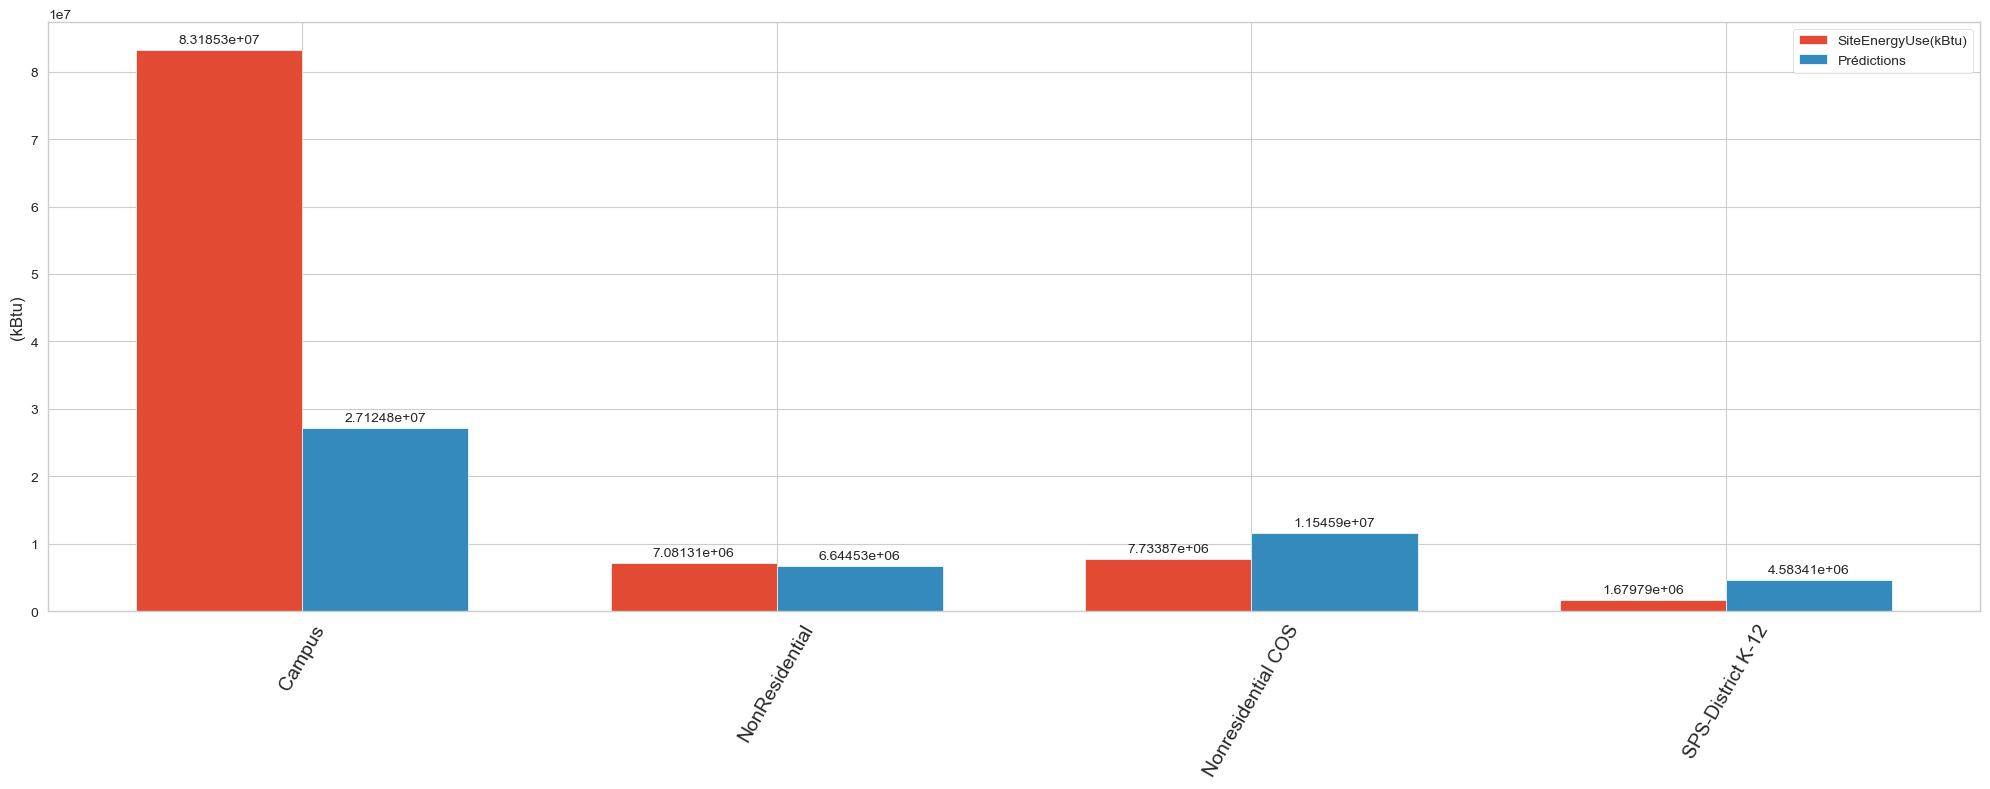

In [42]:
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(20,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUse(kBtu)'], width, label='SiteEnergyUse(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)
plt.xticks(rotation='60', fontsize=14)
fig.tight_layout()

plt.show()

L'écart est très important sur la catégorie "Campus" qui est faiblement représentée dans le jeu de données mais qui présente les plus grandes consommations.

In [43]:
final_SEU_test = pd.concat([X_test,Y_test],axis=1)
final_SEU_test['SEU_pred'] = SEU_pred
compare_final_SEU_test = final_SEU_test = final_SEU_test.groupby(by='Neighborhood').mean()

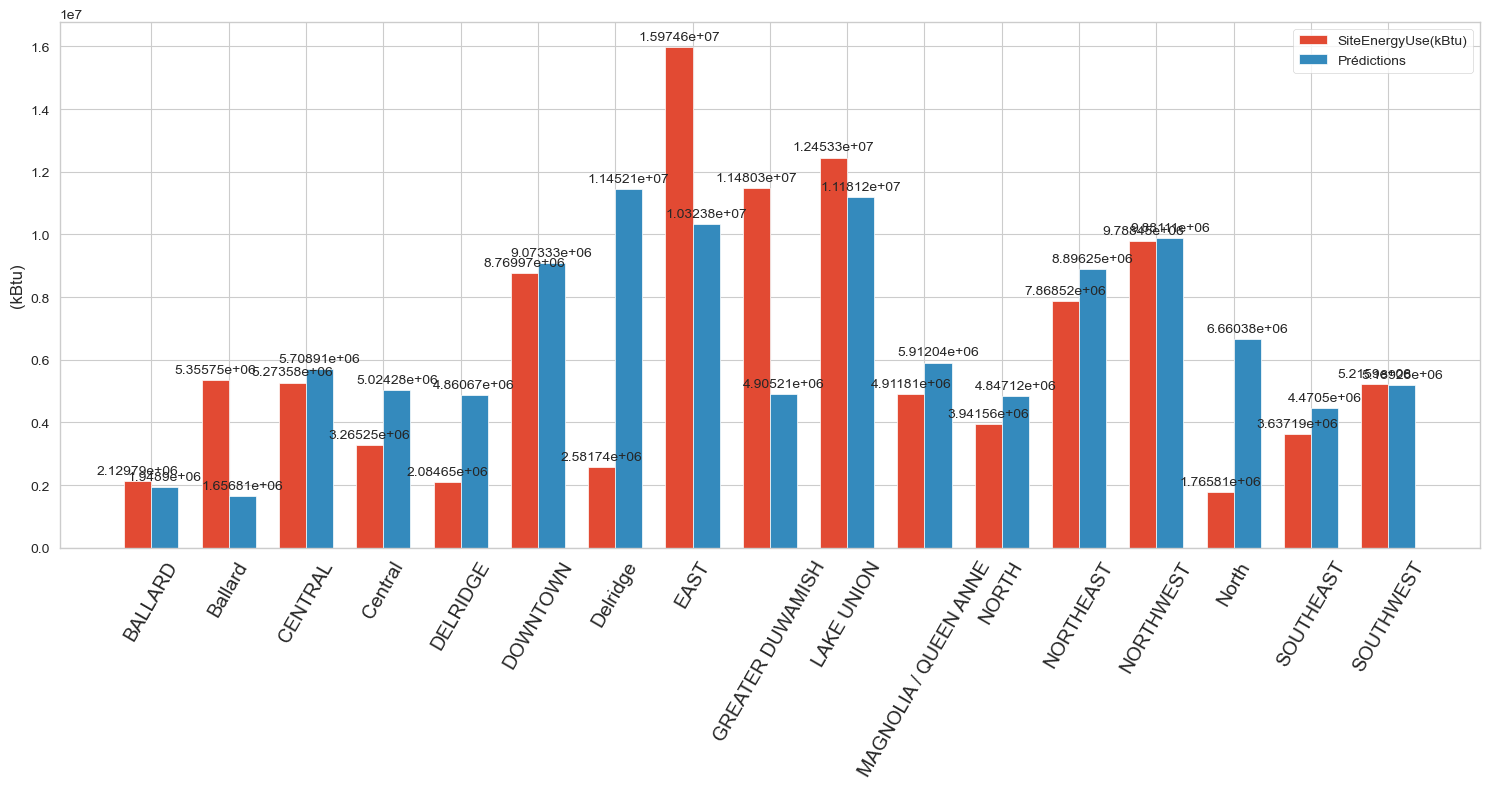

In [44]:
x = np.arange(len(compare_final_SEU_test.index))
width = 0.35

fig, ax = plt.subplots(figsize=(15,8), sharey=False, sharex=False)

scores1 = ax.bar(x - width/2, compare_final_SEU_test['SiteEnergyUse(kBtu)'], width, label='SiteEnergyUse(kBtu)')
scores2 = ax.bar(x + width/2, compare_final_SEU_test['SEU_pred'], width, label='Prédictions')
ax.set_ylabel('(kBtu)')
ax.set_xticks(x)
ax.set_xticklabels(compare_final_SEU_test.index)
ax.legend()
ax.bar_label(scores1, padding=3)
ax.bar_label(scores2, padding=3)
plt.xticks(rotation='60', fontsize=14)
fig.tight_layout()


plt.show()

### Influence du score ENERGY STAR sur les performances de notre modélisation

In [45]:
X['energystar_score'] = energystar_score
#Ajout de la variable dans les variables numérique du preprocessor
numerical_features_col.append('energystar_score')

**Filtrage des données ayant un Energy Star Score renseigné**

In [46]:
#Filtrage des données ayant un Energy Star Score renseigné
X = X[X['energystar_score'].isnull()==False]
Y = Y[Y.index.isin(list(X.index))]

##### Regardons la distribution de cette variable ainsi que sa relation avec **SiteEnergyUse(kBtu)** :

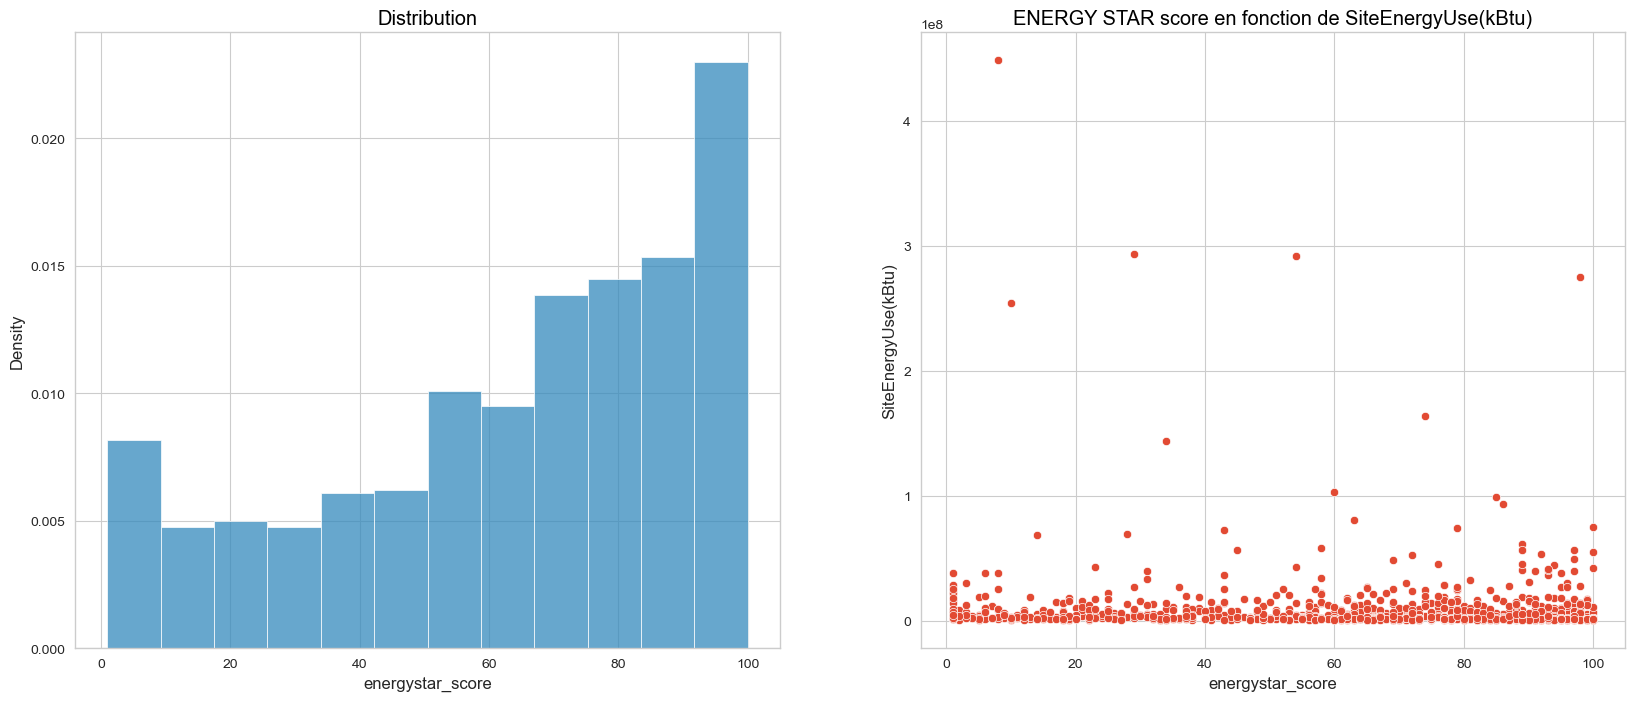

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=X, x='energystar_score', stat="density", ax=axes[0])
axes[0].set_title("Distribution", color='black')
sns.scatterplot(data=pd.concat([X,Y], axis=1),y='SiteEnergyUse(kBtu)',x='energystar_score', ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de SiteEnergyUse(kBtu)", color='black')
plt.show()

On remarque ici que le score ENERGY STAR ne semble pas avoir de corrélation importante avec SiteEnergyUse(kBtu). La distribution ne suit pas de loi normale et la majorité des batiments a un score supérieur à 50 

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 796 lignes,
Test: 200 lignes.



In [49]:
rfr_grid_cv_eStar = Pipeline([
    ('preprocessor', preprocessor),
    ('grid_search_rfr_eStar', GridSearchCV(
                            TransformedTargetRegressor(
                            regressor=RandomForestRegressor()),
                            param_grid=param_rfr,
                            cv=5,
                            scoring=('r2','neg_mean_absolute_error'),
                            refit='neg_mean_absolute_error',
                            n_jobs = -1))])

On utilise ici le meilleur modèle calculé sur la variable  en incluant l'ENERGY STAR Score :

In [50]:
EU_rfr_model_eStar = rfr_grid_cv_eStar.fit(X_train, Y_train)
EU_rfr_results_eStar = model_scores(EU_rfr_model_eStar, 'grid_search_rfr_eStar')

In [51]:
def best_param(pip,step):
   
    best_params = pip.named_steps[step].best_params_
    
    return best_params


In [52]:
 best_par =best_param(EU_rfr_model_eStar, 'grid_search_rfr_eStar')

In [53]:
best_par

{'regressor__bootstrap': False,
 'regressor__max_depth': 50,
 'regressor__max_features': 'sqrt',
 'regressor__min_samples_leaf': 1,
 'regressor__min_samples_split': 2}

In [54]:
def Best_model_estimator(pip,step):
    best_estimator = pip.named_steps[step].best_estimator_
    
    return best_estimator

**Calcul des métriques**

In [55]:
EU_pred_star = EU_rfr_model_eStar.predict(X_test)
EUmetricsES = metrics_model(Y_test,EU_pred_star)
EUmetrics = SEUmetrics.rename(columns={"Résultats" : "Sans ENERGY STAR"})
EUmetrics['Avec ENERGY STAR'] = EUmetricsES['Résultats']
EUmetrics

,Métrique,Sans ENERGY STAR,Avec ENERGY STAR
0,MAE,4889862.007025,4205278.198134
1,R²,[0.3808813488967062],[0.7050602470733224]


**Affichage des valeurs prédites vs valeurs réélles**

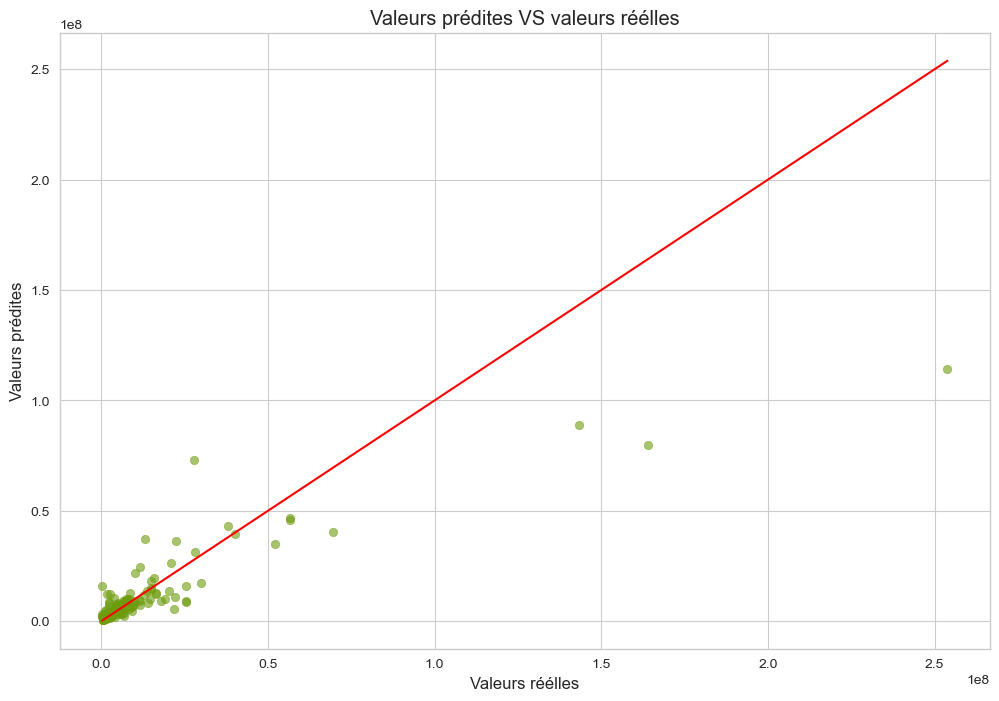

In [56]:
y_pred=SEU_pred
y_true=Y_test
X_plot = [Y_test.min(), Y_test.max()]
fig = plt.figure(figsize=(12,8))
plt.scatter(Y_test, EU_pred_star, color="#6D9C0E", alpha=.6)
plt.plot(X_plot, X_plot, color='r')
plt.xlabel("Valeurs réélles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs prédites VS valeurs réélles")
plt.show()


**les métriques se sont améliorées grâce à la prise en compte de l'ENERGY STAR Score**. 

En revanche, cette variable est encore **peu renseignée et le jeu de données comporte peu d'entrées**. Il est donc difficile de savoir si cette amélioration est **rééllement significative**. 

# Explicabilité du modèle

In [57]:
numeric_features = X.select_dtypes(include=['int64','float64'])
Numerical=list(numeric_features.columns)
categoric_features = X.select_dtypes(exclude=['int64','float64']) 
categorical=list(categoric_features.columns)

In [58]:
categorical

['BuildingType', 'PrimaryPropertyType', 'Neighborhood']

In [59]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(X[categorical]).toarray())

encoder.get_feature_names(categoric_features.columns)

encoder_df.columns = encoder.get_feature_names(categoric_features.columns)

scaler=RobustScaler(unit_variance=True)
p = pd.DataFrame(scaler.fit_transform(X[Numerical]), columns=numeric_features.columns)

In [60]:
m=pd.merge(encoder_df,p, left_index=True, right_index=True)

In [61]:
#list(encoder_df.columns)

In [62]:
X_trains, X_tests, Y_trains, Y_tests = train_test_split(m, Y, test_size=0.2, random_state=42)

print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_trains.shape[0],
                                                            X_tests.shape[0]))

Entrainement: 796 lignes,
Test: 200 lignes.



In [63]:
X_trains.head()

,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,...,PropertyGFATotal,BuildingAge_rescaled,GFABuildingNormalised,GFAParkingNormalised,GFAPerBuilding,GFAPerFloor,Electricity_ratio,Natural_gas_ratio,SteamUse_ratio,energystar_score
626,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.210870,0.000000,0.000000,0.000000,-0.191365,-0.157365,0.061186,0.116377,0.0,0.153293
307,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.324130,1.079184,0.000000,0.000000,-0.079784,-0.169511,0.367283,-0.204553,0.0,0.613173
662,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.185080,-0.404694,-0.360731,0.360731,-0.164258,-0.675174,0.670595,-0.522564,0.0,-0.214610
394,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.689601,-0.674490,0.000000,0.000000,0.755067,4.506269,-0.209809,0.400506,0.0,0.306586
644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.393111,0.269796,0.000000,0.000000,-0.382908,0.205588,-0.579326,0.787929,0.0,-1.103711


## Utilisons  le **best_estimator**

In [64]:
best_estimator =Best_model_estimator(EU_rfr_model_eStar, 'grid_search_rfr_eStar')
best_estimator

TransformedTargetRegressor(regressor=RandomForestRegressor(bootstrap=False,
                                                           max_depth=50,
                                                           max_features='sqrt'))

In [65]:
model=RandomForestRegressor(bootstrap=False, max_depth=25, max_features='sqrt')

In [66]:
model.fit(X_trains, Y_trains);

In [67]:
import shap
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
# Calculate Shap values
shap_values = explainer.shap_values(X_trains)


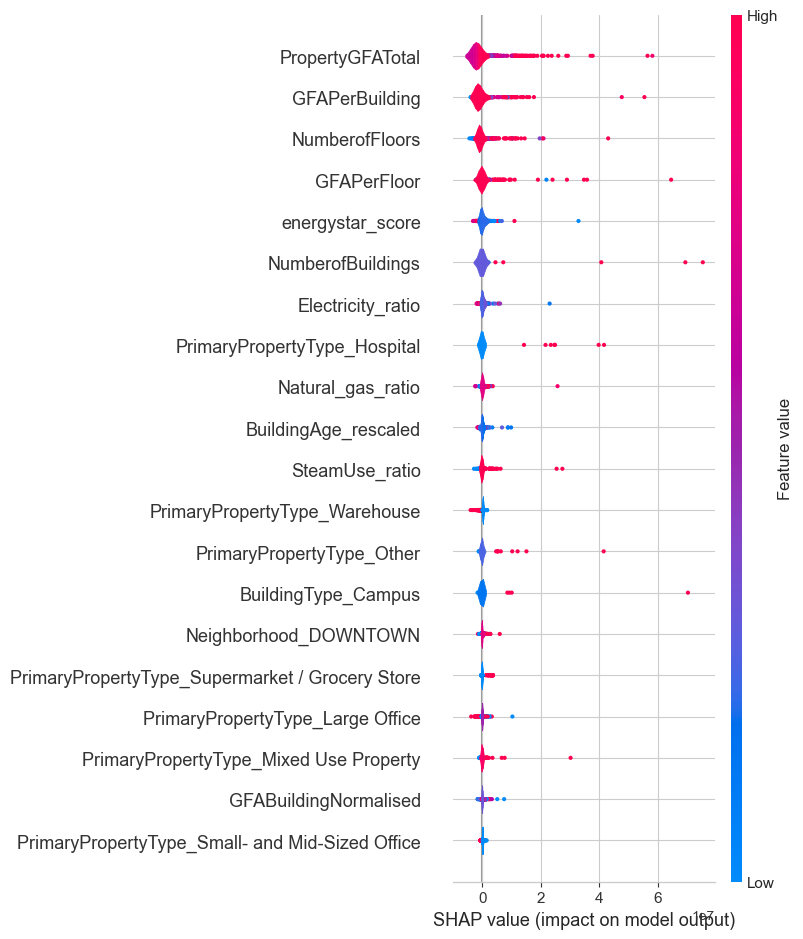

In [68]:
shap.summary_plot(shap_values, X_trains, plot_type="violin", feature_names = list(X_trains.columns))

## Diagramme de décision SHAP


Le diagramme de décision affiche essentiellement les mêmes informations que le diagramme de force. La ligne verticale grise est la valeur de base et la ligne rouge indique si chaque entité a déplacé la valeur de sortie vers une valeur supérieure ou inférieure à la prédiction moyenne.
Ce graphique peut être un peu plus clair et intuitif que le précédent, surtout lorsqu'il y a de nombreuses fonctionnalités à analyser. Dans le diagramme de force, les informations peuvent sembler très condensées lorsque le nombre de prédicteurs est élevé.

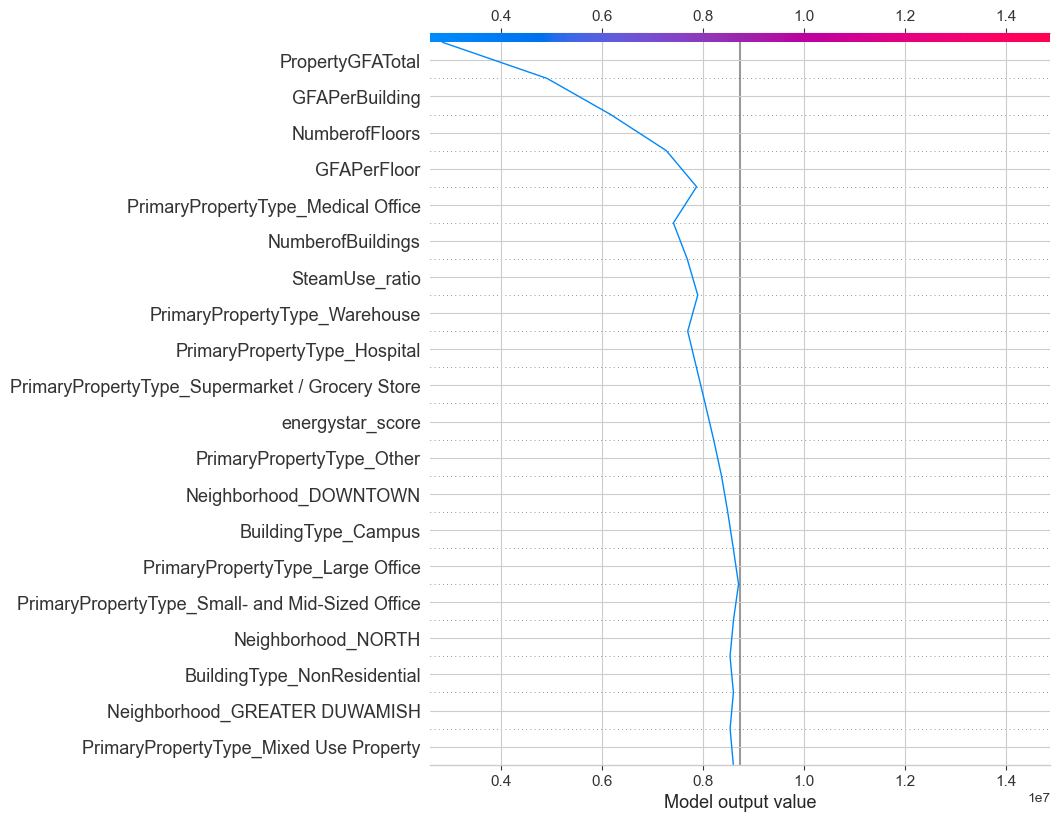

In [72]:
shap.decision_plot(explainer.expected_value[0], shap_values[0],
                   feature_names = list(X_trains.columns))


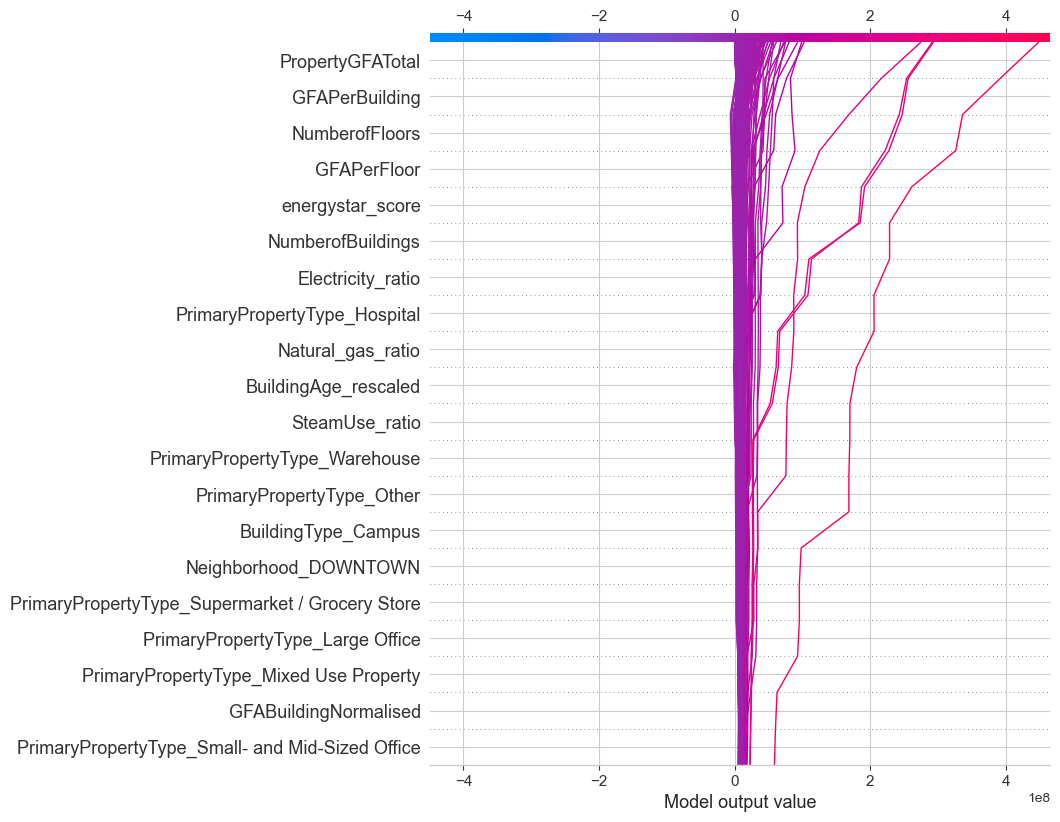

In [71]:

shap.decision_plot(explainer.expected_value, shap_values,
                   feature_names = list(X_trains.columns))



La ligne droite verticale du diagramme de décision marque la valeur de base du modèle. La ligne colorée est la prédiction. Les valeurs des caractéristiques sont imprimées à côté de la ligne de prédiction pour référence. En partant du bas du tracé, la ligne de prédiction montre comment les valeurs SHAP s'accumulent à partir de la valeur de base pour arriver au score final du modèle en haut du tracé. Les diagrammes de décision sont une représentation littérale des valeurs SHAP, ce qui les rend faciles à interpréter.
Le diagramme de force et le diagramme de décision sont tous deux efficaces pour expliquer la prédiction du modèle précédent. L'ampleur et la direction des principaux effets sont faciles à identifier.